# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species*, (under revision).

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

*Note*: Refine a network based after the network was trained on just a few labeled images is illustrated in "Demo-labeledexample-MouseReaching.ipynb". This demo also contains an already labeled data set and is perhaps the best starting point for brand new users.

## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

In [1]:
import deeplabcut

C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
%cd DeepLabCut

C:\Users\Donghan\DeepLabCut


In [3]:
task='Reaching' # Enter the name of your experiment Task
experimenter='Donghan' # Enter the name of the experimenter
video=['1034 SI_B, Aug 15, 13 7 49.mp4'] # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory='C:/Users/Donghan/DeepLabCut/deeplabcut',copy_videos=True) #change the working directory to where you want the folders created.

# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\videos"
Created "C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\labeled-data"
Created "C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\training-datasets"
Created "C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models"
Copying the videos
C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\videos\1034 SI_B, Aug 15, 13 7 49.mp4
Generated "C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\config.yaml"

A new project with name Reaching-Donghan-2019-03-08 is created at C:\Users\Donghan\DeepLabCut\deeplabcut and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at a

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\generate_training_dataset\frame_extraction.py:100: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(ymlfile)


Config file read successfully.
Do you want to extract (perhaps additional) frames for video: C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\videos\1034 SI_B, Aug 15, 13 7 49.mp4 ?
yes/noyes


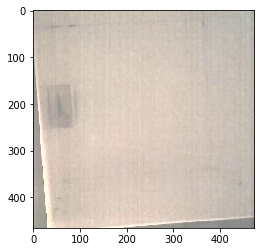

Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 174.05  seconds.

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


In [4]:
%matplotlib inline

deeplabcut.extract_frames(path_config_file,'automatic','uniform',crop=True) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!

## Label the extracted frames
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [5]:
%gui wx
deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [6]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

Creating images with labels by Donghan.
They are stored in the following folder: C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\labeled-data\1034 SI_B, Aug 15, 13 7 49_labeled.
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [7]:
deeplabcut.create_training_dataset(path_config_file)

C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\generate_training_dataset\trainingsetmanipulation.py:328: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  docs.append(yaml.load(raw_doc))


The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If yu want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [8]:
deeplabcut.train_network(path_config_file, shuffle=1, saveiters=300, displayiters=10)

C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\pose_estimation_tensorflow\config.py:43: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Config:
{'all_joints': [[0]],
 'all_joints_names': ['Hand'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ReachingMar8\\Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Donghan\\Anaconda3\\envs\\colab3.6\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'l

Instructions for updating:
Colocations handled automatically by placer.


From C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


From C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\losses\losses_impl.py:209: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use standard file APIs to check for files with this prefix.


From C:\Users\Donghan\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


Restoring parameters from C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\pose_estimation_tensorflow\models\pretrained\resnet_v1_50.ckpt


Display_iters overwritten as 10
Save_iters overwritten as 300
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\Donghan\\DeepLabCut\\deeplabcut\\Reaching-Donghan-2019-03-08\\dlc-models\\iteration-0\\ReachingMar8-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomhei

iteration: 10 loss: 0.2040 lr: 0.005
iteration: 20 loss: 0.0640 lr: 0.005
iteration: 30 loss: 0.0461 lr: 0.005
iteration: 40 loss: 0.0389 lr: 0.005
iteration: 50 loss: 0.0362 lr: 0.005
iteration: 60 loss: 0.0336 lr: 0.005
iteration: 70 loss: 0.0255 lr: 0.005
iteration: 80 loss: 0.0209 lr: 0.005
iteration: 90 loss: 0.0243 lr: 0.005
iteration: 100 loss: 0.0181 lr: 0.005
iteration: 110 loss: 0.0183 lr: 0.005
iteration: 120 loss: 0.0209 lr: 0.005
iteration: 130 loss: 0.0179 lr: 0.005
iteration: 140 loss: 0.0168 lr: 0.005
iteration: 150 loss: 0.0158 lr: 0.005
iteration: 160 loss: 0.0135 lr: 0.005
iteration: 170 loss: 0.0130 lr: 0.005
iteration: 180 loss: 0.0142 lr: 0.005
iteration: 190 loss: 0.0117 lr: 0.005
iteration: 200 loss: 0.0112 lr: 0.005
iteration: 210 loss: 0.0111 lr: 0.005
iteration: 220 loss: 0.0107 lr: 0.005
iteration: 230 loss: 0.0092 lr: 0.005
iteration: 240 loss: 0.0101 lr: 0.005
iteration: 250 loss: 0.0155 lr: 0.005
iteration: 260 loss: 0.0115 lr: 0.005
iteration: 270 loss: 

KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [9]:
deeplabcut.evaluate_network(path_config_file)

C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\pose_estimation_tensorflow\config.py:43: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Config:
{'all_joints': [[0]],
 'all_joints_names': ['Hand'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ReachingMar8\\Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Donghan\\Anaconda3\\envs\\colab3.6\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'l

Running  DeepCut_resnet50_ReachingMar8shuffle1_300  with # of trainingiterations: 300
INFO:tensorflow:Restoring parameters from C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models\iteration-0\ReachingMar8-trainset95shuffle1\train\snapshot-300


Restoring parameters from C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models\iteration-0\ReachingMar8-trainset95shuffle1\train\snapshot-300


Analyzing data...


20it [00:06,  3.02it/s]


Done and results stored for snapshot:  snapshot-300
Results for 300  training iterations: 95 1 train error: 4.46 pixels. Test error: 4.67  pixels.
With pcutoff of 0.1  train error: 4.46 pixels. Test error: 4.67 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [10]:
videofile_path = ['1034 SI_B, Aug 15, 13 7 49.mp4'] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

C:\Users\Donghan\Anaconda3\envs\colab3.6\lib\site-packages\deeplabcut\pose_estimation_tensorflow\config.py:43: YAMLLoadWarning: 
  *** Calling yaml.load() without Loader=... is deprecated.
  *** The default Loader is unsafe.
  *** Please read https://msg.pyyaml.org/load for full details.
  yaml_cfg = edict(yaml.load(f))
Config:
{'all_joints': [[0]],
 'all_joints_names': ['Hand'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_ReachingMar8\\Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\Donghan\\Anaconda3\\envs\\colab3.6\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'l

Using snapshot-300 for model C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models\iteration-0\ReachingMar8-trainset95shuffle1
INFO:tensorflow:Restoring parameters from C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models\iteration-0\ReachingMar8-trainset95shuffle1\train\snapshot-300


Restoring parameters from C:\Users\Donghan\DeepLabCut\deeplabcut\Reaching-Donghan-2019-03-08\dlc-models\iteration-0\ReachingMar8-trainset95shuffle1\train\snapshot-300


Starting to analyze %  1034 SI_B, Aug 15, 13 7 49.mp4
Video already analyzed! .\1034 SI_B, Aug 15, 13 7 49DeepCut_resnet50_ReachingMar8shuffle1_300.h5
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [7]:
deeplabcut.extract_outlier_frames(path_config_file,['behavCam2.avi'])

TypeError: expected str, bytes or os.PathLike object, not NoneType

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

Windows


RuntimeError: wrapped C/C++ object of type FileDialog has been deleted

In [6]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

TypeError: expected str, bytes or os.PathLike object, not NoneType

## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [12]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

Starting %  . ['1034 SI_B, Aug 15, 13 7 49.mp4']
Loading  1034 SI_B, Aug 15, 13 7 49.mp4 and data.
False 0 474 0 466
3481
Duration of video [s]:  174.05 , recorded with  20.0 fps!
Overall # of frames:  3481 with cropped frame dimensions:  474 466
Generating frames and creating video.


100%|██████████| 3481/3481 [00:10<00:00, 321.18it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [0]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)